# Homework 4 Spring 2022

Due 04/18 23:59 

### Davit Barblishvili

### DB3230

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pprint 
pp = pprint.PrettyPrinter(indent=4)


# Part 1: Feed forward network from scratch!

For this part, you are not allowed to use any library other than numpy. 

In this part, you will will implement the forward pass and backward pass (i.e. the derivates of each parameter wrt to the loss) for the following neural network:

<img src="images/nn.png" width=400 height=400/>

The weight matrix for the hidden layer is W1 and has bias b1. 

The weight matrix for the ouput layer is W2 and has bias b2.

Activatation function is **sigmoid** for both hidden and output layer

Loss function is the MSE loss $$L(y,y_t) = \frac{1}{2N}\sum_{n=1}^{N}(y^n - y_{t}^{n})^2$$

Refer to the below dictionary for dimensions for each matrix

In [2]:
np.random.seed(0) # don't change this

weights = {
    'W1': np.random.randn(3, 2),
    'b1': np.zeros(3),
    'W2': np.random.randn(3),
    'b2': 0,
}
X = np.random.rand(1000,2)
Y = np.random.randint(low=0, high=2, size=(1000,))

In [3]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [4]:
#Implement the forward pass
def forward_propagation(X, weights):
    # Z1 -> output of the hidden layer before applying activation
    # H -> output of the  hidden layer after applying activation
    # Z2 -> output of the final layer before applying activation
    # Y -> output of the final layer after applying activation
    
    Z1 = np.dot(X, weights['W1'].T)  + weights['b1']
    H = sigmoid(Z1)
    
    Z2 = np.dot(H, weights['W2'].T)  + weights['b2']
    Y = sigmoid(Z2)

    return Y, Z2, H, Z1

In [5]:
# Implement the backward pass
# Y_T are the ground truth labels
def back_propagation(X, Y_T, weights):
    N_points = X.shape[0]
    
    # forward propagation
    Y, Z2, H, Z1 = forward_propagation(X, weights)
    L = (1/(2*N_points)) * np.sum(np.square(Y - Y_T))
    
    # back propagation
    dLdY = 1/N_points * (Y - Y_T)
    dLdZ2 = np.multiply(dLdY, (sigmoid(Z2)*(1-sigmoid(Z2))))
    dLdW2 = np.dot(H.T, dLdZ2)
    
    dLdb2 = np.dot(dLdZ2.T, np.ones(N_points))
    
    dLdZ1 = np.multiply((np.dot(dLdZ2.reshape(N_points, 1), 
                                weights['W2'].reshape(1, 3))), np.multiply(sigmoid(Z1), (1-sigmoid(Z1))))
    dLdW1 = np.dot(dLdZ1.T, X)
    dLdb1 = np.dot(dLdZ1.T, np.ones(N_points))
    
    gradients = {
        'W1': dLdW1,
        'b1': dLdb1,
        'W2': dLdW2,
        'b2': dLdb2,
    }
    
    return gradients, L

In [6]:
gradients, L = back_propagation(X, Y, weights)
print(L)

0.1332476222330792


In [7]:
pp.pprint(gradients)

{   'W1': array([[ 0.00244596,  0.00262019],
       [-0.00030765, -0.00024188],
       [-0.00034768, -0.000372  ]]),
    'W2': array([0.02216011, 0.02433097, 0.01797174]),
    'b1': array([ 0.00492577, -0.00058023, -0.00065977]),
    'b2': 0.02924923026531869}


Your answers should be close to L = 0.133 and 
'b1': array([ 0.00492, -0.000581, -0.00066]). You will be graded based on your implementation and outputs for L, W1, W2 b1, and b2

You can use any library for the following questions.

# Part 2: Fashion MNIST dataset
The Fashion-MNIST dataset is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. It's commonly used as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning models. You can read more about the dataset at the [Fashion-MNIST homepage](https://github.com/zalandoresearch/fashion-mnist). 

We will utilize tensorflow to import the dataset, however, feel free to use any framework (TF/PyTorch) to answer the assignment questions.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tensorflow.keras.layers import Dense, Dropout, Activation,Conv2D, MaxPooling2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn .metrics import classification_report,confusion_matrix
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [9]:
# load data
(xdev, ydev), (xtest, ytest) = fashion_mnist.load_data()

In [10]:
test_images = xtest

### 2.1 Plot the first 25 samples from both development and test sets on two separate 5$\times $5 subplots. 

Each image in your subplot should be labelled with the ground truth label. Get rid of the plot axes for a nicer presentation. You should also label your plots to indicate if the plotted data is from development or test set. You are given the expected output for development samples.

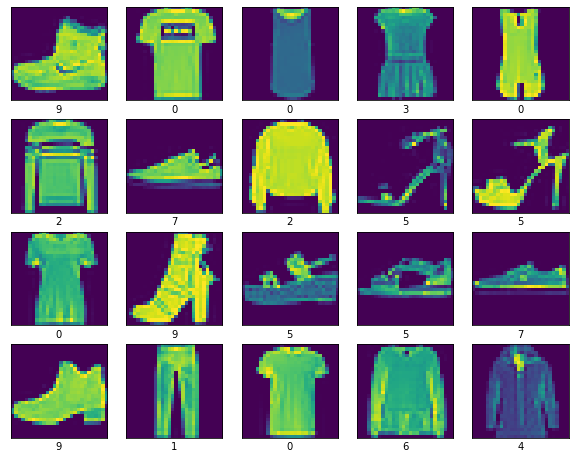

In [11]:
# Plot dev samples

%matplotlib inline
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(xdev[i],  aspect='auto')
    plt.grid(False)
    plt.xlabel(ydev[i])
 

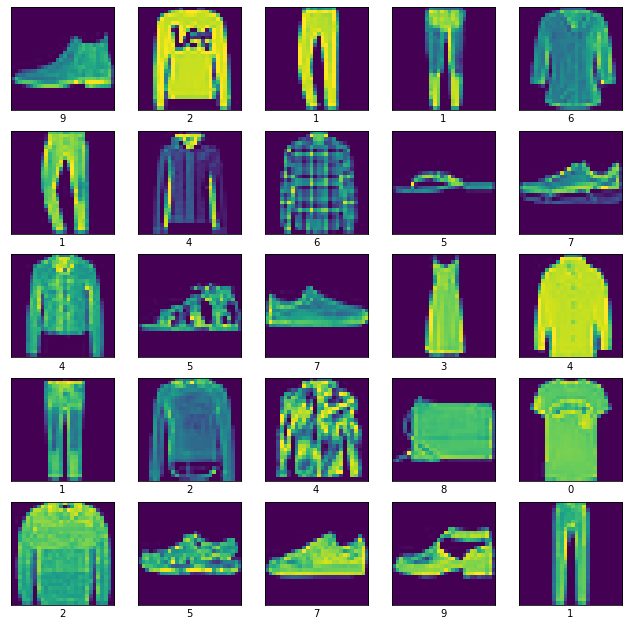

In [12]:
# Plot test samples
plt.figure(figsize=(11,11))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(xtest[i])
    plt.grid(False)
    plt.xlabel(ytest[i])
 

# Part 3: Feed Forward Network

In this part of the homework, we will build and train a deep neural network on the Fashion-MNIST dataset.

### 3.1.1 Print their shapes - $x_\text{dev}, y_{\text{dev}}, x_\text{test}, y_\text{test}$

In [13]:
# Print
print('xdev.shape',xdev.shape)
print('ydev.shape',ydev.shape)
print('xtest.shape',xtest.shape)
print('ytest.shape',ytest.shape)

xdev.shape (60000, 28, 28)
ydev.shape (60000,)
xtest.shape (10000, 28, 28)
ytest.shape (10000,)


### 3.1.2 Flatten the images into one-dimensional vectors. Again, print out the shapes of $x_\text{dev}, x_\text{test}$

In [14]:
# Flatten and print

xdev = tf.keras.layers.Flatten(input_shape=(28,28))(xdev).numpy()
xtest = tf.keras.layers.Flatten(input_shape=(28,28))(xtest).numpy()

2022-04-17 18:19:49.425799: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
print('xdev.shape',xdev.shape)
print('ydev.shape',ydev.shape)
print('xtest.shape',xtest.shape)
print('ytest.shape',ytest.shape)

xdev.shape (60000, 784)
ydev.shape (60000,)
xtest.shape (10000, 784)
ytest.shape (10000,)


### 3.1.3 Standardize the development and test sets. 

Note that the images are 28x28 numpy arrays, and each pixel takes value from 0 to 255.0. 0 means background (white), 255 means foreground (black).

In [16]:
# Standardize
xdev = xdev.astype('float32')
xtest = xtest.astype('float32')
xdev = xdev/255.0
xtest = xtest/255.0

### 3.1.4 Assume your neural network has softmax activation as the last layer activation. Would you consider encoding your target variable? Which encoding would you choose and why? The answer depends on your choice of loss function too, you might want to read 2.2.1 and 2.2.5 before answering this one!

Encode the target variable else provide justification for not doing so. Supporting answer may contain your choice of loss function.


# answer

***I decided not to encode my target variable for the main reason: I am going to be using sparse_categorical_crossentropy which unlike traditional categorical_crossentropy does not require one hot encoding and works perfectly with integer values as well. So here I am skipping any kind of encoding for target variables***

### 3.1.5 Train-test split your development set into train and validation sets (8:2 ratio). 

Note that splitting after encoding does not causes data leakage here because we know all the classes beforehand.

In [17]:
# split

X_train, X_val, y_train, y_val = train_test_split(xdev, ydev, test_size = 0.2, random_state = 42)

### 3.2.1 Build the feed forward network

Using Softmax activation for the last layer and ReLU activation for every other layer, build the following model:

1. First hidden layer size - 128
2. Second hidden layer size - 64
3. Third and last layer size - You should know this



In [18]:
# build model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation=tf.nn.relu, name='input_to_hidden1', input_shape=(784, )),
    tf.keras.layers.Dense(64, activation=tf.nn.relu, name='hidden1_to_hidden2'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax, name='hidden_to_logits'),
])
model.build()

### 3.2.2 Print out the model summary

In [19]:
# print summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_to_hidden1 (Dense)     (None, 128)               100480    
_________________________________________________________________
hidden1_to_hidden2 (Dense)   (None, 64)                8256      
_________________________________________________________________
hidden_to_logits (Dense)     (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


### 3.2.3 Report the total number of trainable parameters. Do you think this number is dependent on the image height and width? Only Yes/No required. 

In [20]:
# answer. Yes it depeneds on the image height and width since each convolutional layer takes input shape and outputs
# some number which then is used as an input. 
model.count_params()


109386

### 3.2.4 Print out your model's output on first train sample. This will confirm if your dimensions are correctly set up. Is the sum of this output equal to 1 upto two decimal places?

In [21]:
# answer
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss_object, metrics=['accuracy'])

In [22]:
model.fit(X_train,y_train,epochs=1)

   1/1500 [..............................] - ETA: 3:51 - loss: 2.2960 - accuracy: 0.1250

2022-04-17 18:19:49.715805: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


1500/1500 [==============================] - 2s 961us/step - loss: 1.7986 - accuracy: 0.6740


### 3.2.5 Considering the output of your model and overall objective, what loss function would you choose and why? Choose a metric for evaluation and explain the reason behind your choice.

# answer
 I am going to choose sparse_categorical_crossentropy since each item belongs to only one class. The data we have is that scenario when one clothing item belongs one class, either t-shirt, short, etc. Additionally, the truth values that I have is not one hot encoded values and therefore using categorical crossentropy would not make sense. on the other side, sparse_categorical_crossentropy would make more sense since the truth values are integers. 

### 3.2.6 Using the metric and loss function above, with Adam as the optimizer, train your model for 20 epochs with batch size 128. 

Make sure to save and print out the values of loss function and metric after each epoch for both train and validation sets.

Note - Use appropriate learning rate for the optimizer, you might have to try different values

In [23]:
# train
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=128, validation_data=(X_val, y_val),  epochs=20,)

Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 0.9318 - accuracy: 0.7855 - val_loss: 0.4510 - val_accuracy: 0.8367
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3964 - accuracy: 0.8605 - val_loss: 0.4079 - val_accuracy: 0.8545
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3541 - accuracy: 0.8736 - val_loss: 0.3665 - val_accuracy: 0.8664
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3258 - accuracy: 0.8824 - val_loss: 0.3582 - val_accuracy: 0.8695
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3027 - accuracy: 0.8890 - val_loss: 0.3219 - val_accuracy: 0.8838
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2837 - accuracy: 0.8972 - val_loss: 0.3224 - val_accuracy: 0.8821
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2715 - accuracy: 0.9009 - val_loss: 0.3334 - val_accuracy: 0.8789
Epoch 

### 3.2.7 Plot two separate plots displaying train vs validation loss and train vs validation metric scores over each epoch

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


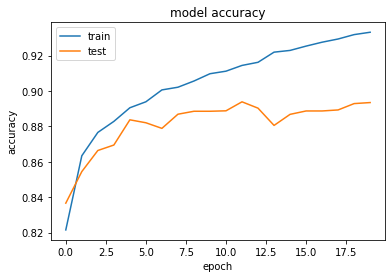

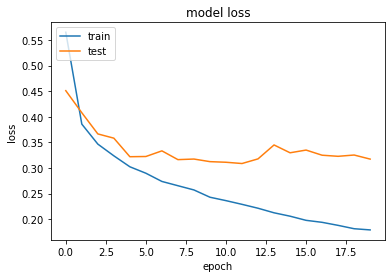

In [24]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 3.3.1 Report metric score on test set

In [25]:
# evaluate
yhat = model.predict(xtest)
yhat=np.argmax(yhat,axis=1)

# evaluate predictions
accuracy = accuracy_score(ytest, yhat)
print('Accuracy: %.3f' % (accuracy * 100))



Accuracy: 88.780


### 3.3.2 Plot confusion matrix on the test set and label the axes appropriately with true and predicted labels. 

Labels on the axes should be the original classes (0-9) and not one-hot-encoded. To achieve this, you might have to reverse transform your model's predictions. Please look into the documentation of your target encoder. Sample output is provided

In [26]:
l = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
'Shirt','Sneaker','Bag','Ankle boot']


In [27]:
con = pd.DataFrame(confusion_matrix(ytest,yhat),index=l,columns=l)
con

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,892,2,17,15,4,1,62,0,7,0
Trouser,4,972,1,15,4,1,1,0,2,0
Pullover,21,1,773,12,108,0,83,0,2,0
Dress,31,7,12,888,40,0,16,0,5,1
Coat,0,1,62,28,854,0,53,0,2,0
Sandal,0,0,0,1,0,948,0,30,1,20
Shirt,160,0,64,28,80,0,662,0,6,0
Sneaker,0,0,0,0,0,11,0,958,2,29
Bag,13,0,1,5,5,1,4,3,968,0
Ankle boot,1,0,0,1,0,6,1,28,0,963


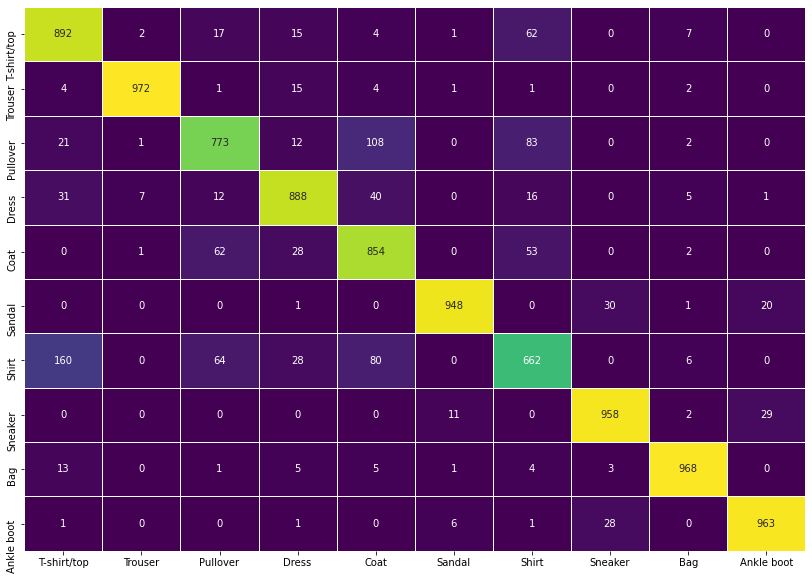

In [28]:
# confusion matrix
fig = plt.figure(figsize=(14,10))
sns.heatmap(con,annot=True,cmap='viridis',linewidths=1,cbar=False,fmt='.5g')
plt.show()

### 3.3.3 Plot the first 25 samples of test dataset on a 5$\times $5 subplot and this time label the images with both the ground truth (GT) and predicted class (P). 

For instance, an image of class 3, with predicted class 7 should have the label GT:3, P:7. Get rid of the plot axes for a nicer presentation.

Predict:  Ankle boot


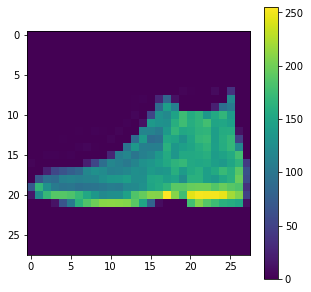

In [29]:
# Plot with predictions
print('Predict: ',l[(np.argmax(yhat[1]) - 1)])
plt.figure(figsize=(5,5))
plt.imshow(test_images[np.argmax(yhat[1])])
plt.colorbar()
plt.grid(False)

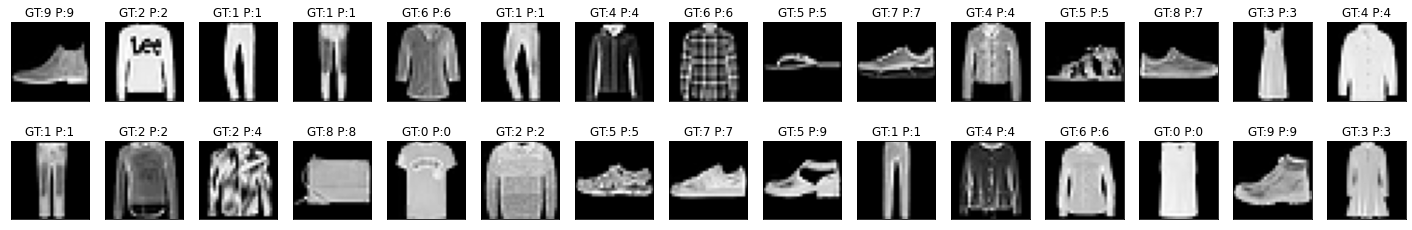

In [30]:
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(30):
    ax = fig.add_subplot(2, 15, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(test_images[idx]), cmap='gray')
    ax.set_title("GT:{} P:{}".format(str(yhat[idx]), str(ytest[idx])))

# Part 4: Convolutional Neural Network

In this part of the homework, we will build and train a classical convolutional neural network, LeNet-5, on the Fashion-MNIST dataset. 

In [31]:
# load data again
(xdev, ydev), (xtest, ytest) = fashion_mnist.load_data()

In [32]:
print('Train: X=%s, y=%s' % (xdev.shape, ydev.shape))
print('Test: X=%s, y=%s' % (xtest.shape, ytest.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


### 4.1 Preprocess

1. Standardize the datasets

2. Encode the target variable.

3. Split development set to train and validation sets (8:2).

In [33]:
# TODO: Standardize the datasets
# convert from integers to floats
img_rows, img_cols = 28, 28

# normalize to range 0-1
xdev = xdev / 255.0
X_test = xtest / 255.0

xdev = xdev.reshape(xdev.shape[0], img_rows, img_cols, 1).astype('float32')
X_test = xtest.reshape(xtest.shape[0], img_rows, img_cols, 1).astype('float32')

# TODO: Encode the target labels
y_test = tf.keras.utils.to_categorical(ytest,num_classes=10)
ydev = tf.keras.utils.to_categorical(ydev,num_classes=10)
# Split
X_train, X_val, y_train, y_val = train_test_split(xdev, ydev, test_size = 0.2, random_state = 42)

In [34]:
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Val: X=%s, y=%s' % (X_val.shape, y_val.shape))
print('test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(48000, 28, 28, 1), y=(48000, 10)
Val: X=(12000, 28, 28, 1), y=(12000, 10)
test: X=(10000, 28, 28, 1), y=(10000, 10)


### 4.2.1 LeNet-5

We will be implementing the one of the first CNN models put forward by Yann LeCunn, which is commonly refered to as LeNet-5. The network has the following layers:

1. 2D convolutional layer with 6 filters, 5x5 kernel, stride of 1  padded to yield the same size as input, ReLU activation
2. Maxpooling layer of 2x2
3. 2D convolutional layer with 16 filters, 5x5 kernel, 0 padding, ReLU activation 
4. Maxpooling layer of 2x2 
5. 2D convolutional layer with 120 filters, 5x5 kernel, ReLU activation. Note that this layer has 120 output channels (filters), and each channel has only 1 number. The output of this layer is just a vector with 120 units!
6. A fully connected layer with 84 units, ReLU activation
7. The output layer where each unit respresents the probability of image being in that category. What activation function should you use in this layer? (You should know this)

In [35]:
# TODO: build the model

input_shape = (img_rows, img_cols, 1)
model = Sequential()

# CNN-LAYERS
model.add(Conv2D(6, (5, 5),padding='same', strides = 1, activation='relu',
                 kernel_initializer='he_uniform', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(16, (5, 5), kernel_initializer='he_uniform',  padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(120, (5, 5), kernel_initializer='he_uniform', activation='relu'))
model.add(Flatten())

model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))



### 4.2.2 Report layer output

Report the output dimensions of each layers of LeNet-5. **Hint:** You can report them using the model summary function that most frameworks have, or you can calculate and report the output dimensions by hand (It's actually not that hard and it's a good practice too!)

In [36]:
# TODO: report model output dimensions
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 120)         48120     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1080)              0         
_________________________________________________________________
dense (Dense)                (None, 84)               

### 4.2.3 Model training

Train the model for 10 epochs. In each epoch, record the loss and metric (chosen in part 3) scores for both train and validation sets. Use two separate plots to display train vs validation metric scores and train vs validation loss. Finally, report the model performance on the test set. Feel free to tune the hyperparameters such as batch size and optimizers to achieve better performance.

In [37]:
# TODO: Train the model
adam = Adam()
model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['accuracy'])

In [38]:
hist = model.fit(X_train, y_train,validation_data=(X_val,y_val), epochs=10,batch_size=128,verbose=1)


Epoch 1/10
375/375 [==============================] - 10s 27ms/step - loss: 0.7324 - accuracy: 0.7445 - val_loss: 0.3836 - val_accuracy: 0.8626
Epoch 2/10
375/375 [==============================] - 10s 27ms/step - loss: 0.3541 - accuracy: 0.8716 - val_loss: 0.3423 - val_accuracy: 0.8728
Epoch 3/10
375/375 [==============================] - 10s 26ms/step - loss: 0.2959 - accuracy: 0.8926 - val_loss: 0.3009 - val_accuracy: 0.8909
Epoch 4/10
375/375 [==============================] - 10s 26ms/step - loss: 0.2755 - accuracy: 0.8979 - val_loss: 0.3042 - val_accuracy: 0.8907
Epoch 5/10
375/375 [==============================] - 10s 26ms/step - loss: 0.2387 - accuracy: 0.9134 - val_loss: 0.2854 - val_accuracy: 0.8933
Epoch 6/10
375/375 [==============================] - 10s 26ms/step - loss: 0.2152 - accuracy: 0.9209 - val_loss: 0.2866 - val_accuracy: 0.8967
Epoch 7/10
375/375 [==============================] - 10s 26ms/step - loss: 0.1989 - accuracy: 0.9260 - val_loss: 0.2811 - val_accuracy:

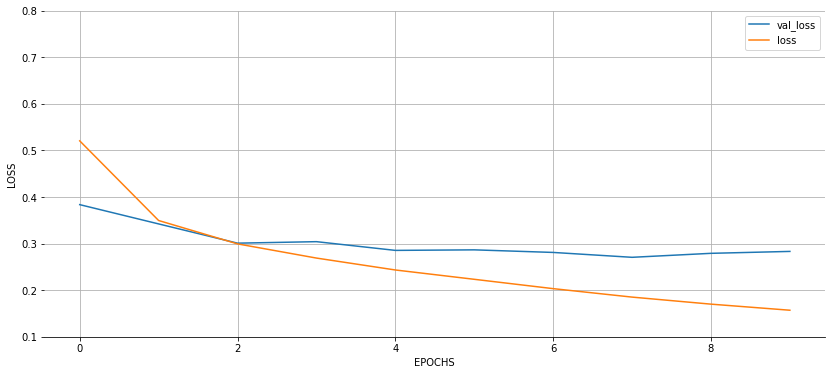

In [39]:
# TODO: Plot accuracy and loss over epochs
val_acc = hist.history['val_accuracy']
acc = hist.history['accuracy']
val_loss = hist.history['val_loss']
loss = hist.history['loss']

fig = plt.figure(figsize=(14,6))
plt.plot(np.arange(len(val_loss)),val_loss,label='val_loss')
plt.plot(np.arange(len(loss)),loss,label='loss')
plt.ylim(0.1,0.8)
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend()
plt.grid()
sns.despine(left=True)
plt.show()


Value Accuracy |  90.19 %


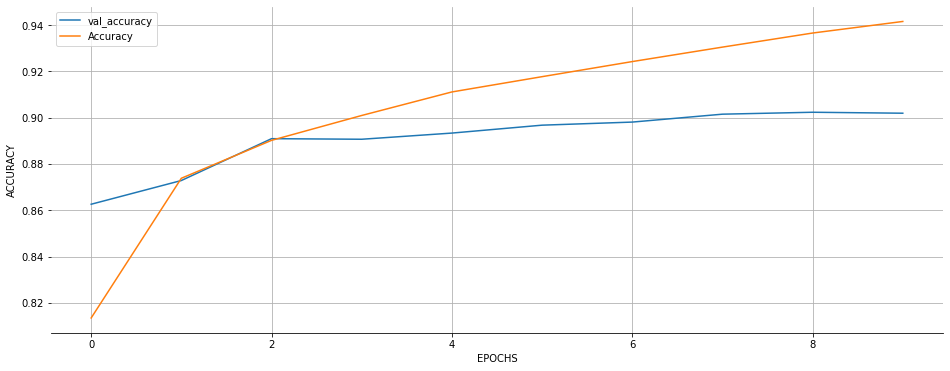

In [40]:
print("\nValue Accuracy | ",round(val_acc[len(acc)-1]*100,2),'%')
fig = plt.figure(figsize=(16,6))
plt.plot(np.arange(len(val_acc)),val_acc,label='val_accuracy')
plt.plot(np.arange(len(acc)),acc,label='Accuracy')
plt.xlabel("EPOCHS")
plt.ylabel('ACCURACY')
plt.legend()
plt.grid()
sns.despine(left=True)
plt.show()

In [41]:
pred = model.predict(X_test,batch_size=250)
y_test_arg=np.argmax(y_test,axis=1)

In [42]:
prd =[]
for i in range(len(pred)):
    prd.append(np.argmax(pred.round()[i]))
    


In [43]:
con = pd.DataFrame(confusion_matrix(y_test_arg,prd),index=l,columns=l)
con

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,736,2,13,17,12,2,211,0,6,1
Trouser,2,983,0,6,4,0,4,0,1,0
Pullover,16,3,721,5,140,1,114,0,0,0
Dress,21,30,8,803,87,0,46,1,4,0
Coat,0,1,16,6,932,0,45,0,0,0
Sandal,0,0,0,0,0,998,0,1,0,1
Shirt,66,4,40,13,123,0,745,0,9,0
Sneaker,0,0,0,0,0,125,0,844,2,29
Bag,1,2,0,1,8,3,8,4,972,1
Ankle boot,0,0,0,0,0,20,0,41,0,939


In [44]:
l = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
'Shirt','Sneaker','Bag','Ankle boot']

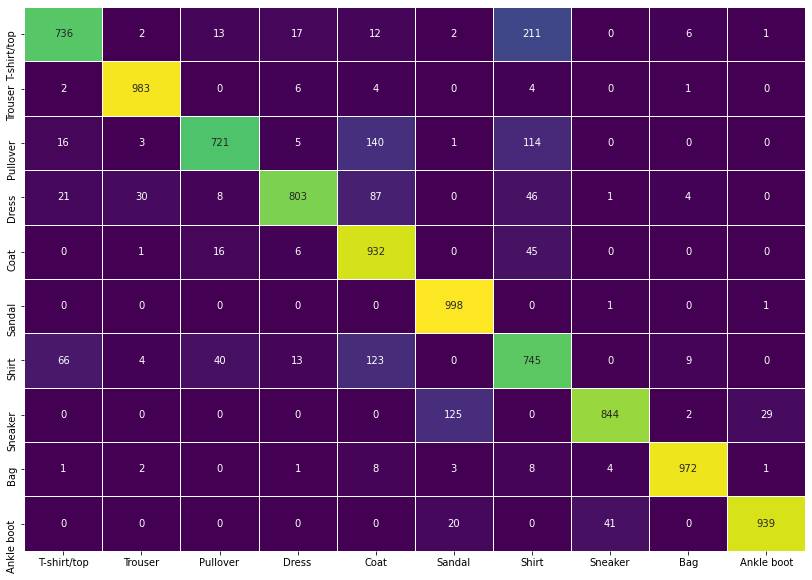

In [45]:


#print('\nConfusion Matrix Graph--->')
fig = plt.figure(figsize=(14,10))
sns.heatmap(con,annot=True,cmap='viridis',linewidths=1,cbar=False,fmt='.5g')
plt.show()

**What do you see from the plots? Are there signs of overfitting? If so, what are 
the signs and what techniques can we use to combat overfitting?**

There are definitely some signs of overffiting. In confusion matrix, we see the evidence of it. Also, training accuracy is close 94 % while the test accuracy is 87 so there has to be some overfitting. Methods to fix overfitting are dropout and batch normalization

### 4.2.4 Report metric score on test set

In [46]:
# evaluate on test set

# evaluate
yhat = model.predict(X_test)
yhat=np.argmax(yhat,axis=1)

# evaluate predictions
accuracy = accuracy_score(ytest, yhat)
print('Accuracy: %.3f' % (accuracy * 100))


Accuracy: 86.730


### 4.3 Overfitting

### 4.3.1 Drop-out

To overcome overfitting, we will train the network again with dropout this time. For hidden layers use dropout probability of 0.5. Train the model again for 15 epochs, use two plots to display train vs validation metric scores and train vs validation loss over each epoch. Report model performance on test set. What's your observation?

In [47]:
# TODO: build the model with drop-out layers

input_shape = (img_rows, img_cols, 1)
model = Sequential()

# CNN-LAYERS
model.add(Conv2D(6, (5, 5),padding='same', strides = 1, kernel_initializer='he_uniform', input_shape=input_shape))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(16, (5, 5), kernel_initializer='he_uniform',  padding='same', ))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2))) 


model.add(Conv2D(120, (5, 5), kernel_initializer='he_uniform', activation='relu'))
model.add(Flatten())

model.add(Dense(84, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 16)        2416      
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 16)       

In [48]:
# TODO: train the model

adam = Adam()
model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['accuracy'])

hist = model.fit(X_train, y_train,validation_data=(X_val,y_val), epochs=15,batch_size=128,verbose=1)


Epoch 1/15
375/375 [==============================] - 11s 29ms/step - loss: 0.9208 - accuracy: 0.6714 - val_loss: 0.4291 - val_accuracy: 0.8497
Epoch 2/15
375/375 [==============================] - 11s 29ms/step - loss: 0.4406 - accuracy: 0.8442 - val_loss: 0.3628 - val_accuracy: 0.8682
Epoch 3/15
375/375 [==============================] - 11s 28ms/step - loss: 0.3766 - accuracy: 0.8664 - val_loss: 0.3043 - val_accuracy: 0.8878
Epoch 4/15
375/375 [==============================] - 11s 28ms/step - loss: 0.3359 - accuracy: 0.8815 - val_loss: 0.2895 - val_accuracy: 0.8947
Epoch 5/15
375/375 [==============================] - 11s 28ms/step - loss: 0.3110 - accuracy: 0.8893 - val_loss: 0.2786 - val_accuracy: 0.8959
Epoch 6/15
375/375 [==============================] - 11s 28ms/step - loss: 0.2885 - accuracy: 0.8972 - val_loss: 0.2769 - val_accuracy: 0.8945
Epoch 7/15
375/375 [==============================] - 11s 28ms/step - loss: 0.2775 - accuracy: 0.8995 - val_loss: 0.2691 - val_accuracy:

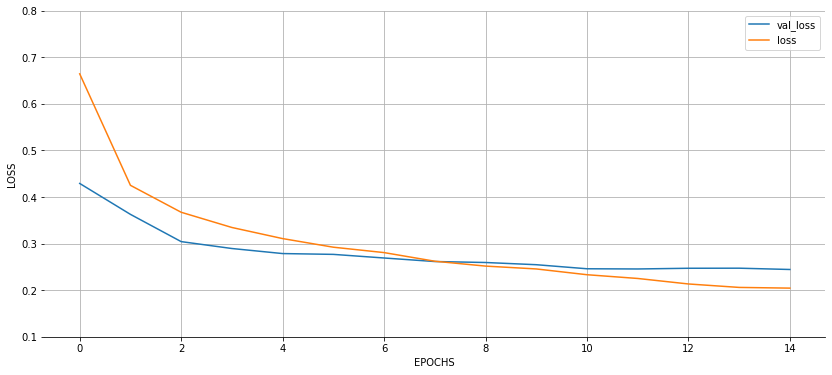

In [49]:
# TODO: plot 
val_acc = hist.history['val_accuracy']
acc = hist.history['accuracy']
val_loss = hist.history['val_loss']
loss = hist.history['loss']

fig = plt.figure(figsize=(14,6))
plt.plot(np.arange(len(val_loss)),val_loss,label='val_loss')
plt.plot(np.arange(len(loss)),loss,label='loss')
plt.ylim(0.1,0.8)
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend()
plt.grid()
sns.despine(left=True)
plt.show()




Value Accuracy |  91.1 %


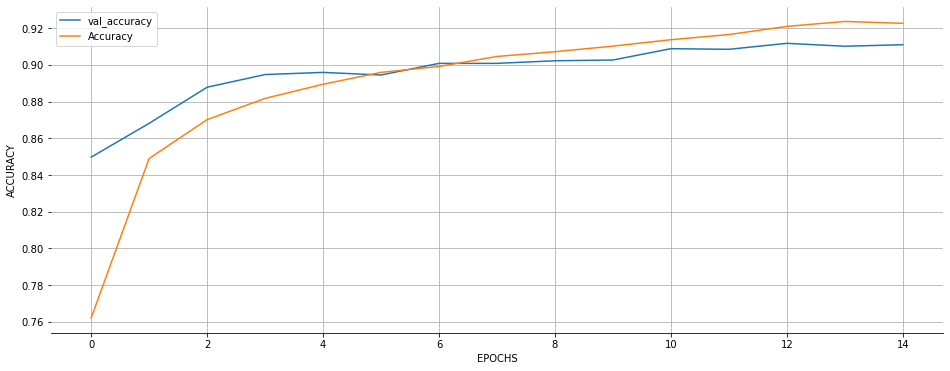

In [50]:
print("\nValue Accuracy | ",round(val_acc[len(acc)-1]*100,2),'%')
fig = plt.figure(figsize=(16,6))
plt.plot(np.arange(len(val_acc)),val_acc,label='val_accuracy')
plt.plot(np.arange(len(acc)),acc,label='Accuracy')
plt.xlabel("EPOCHS")
plt.ylabel('ACCURACY')
plt.legend()
plt.grid()
sns.despine(left=True)
plt.show()

In [51]:
# TODO: Report model performance on test set

yhat = model.predict(X_test)
yhat=np.argmax(yhat,axis=1)

# evaluate predictions
accuracy = accuracy_score(ytest, yhat)
print('Accuracy: %.3f' % (accuracy * 100))

Accuracy: 88.260


**What's your observation?**

**Answer:** accuracy is very similar to the previous model, however, based on the graph, we can see that there is some regularization. Also the model perfoms little lower on trian data than the previous model but the test data efficienncy is okay. Compare to previous model, even though the model trains little worse on training data, it performs better on test data which means some variables have been relaxed and the model is not overfitted on train data. 

### 4.3.2 Batch Normalization

This time, let's apply a batch normalization after every hidden layer, train the model for 15 epochs, plot the metric scores and loss values, and report model performance on test set as above. Compare this technique with the original model and with dropout, which technique do you think helps with overfitting better?

In [52]:
# TODO: build the model with batch normalization layers

input_shape = (img_rows, img_cols, 1)
model = Sequential()

# CNN-LAYERS
model.add(Conv2D(6, (5, 5),padding='same',kernel_initializer='uniform', strides = 1, input_shape=input_shape))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))


model.add(Conv2D(16, (5, 5), kernel_initializer='he_uniform',  padding='same', ))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(120, (5, 5), kernel_initializer='he_uniform',))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(84, activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 6)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 6)         24        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 16)        2416      
_________________________________________________________________
activation_3 (Activation)    (None, 14, 14, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 16)       

In [53]:
# TODO: train the model
adam = Adam()
model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['accuracy'])

hist = model.fit(X_train, y_train,validation_data=(X_val,y_val), epochs=15,batch_size=128,verbose=1)

Epoch 1/15
375/375 [==============================] - 12s 32ms/step - loss: 0.6116 - accuracy: 0.7813 - val_loss: 1.1966 - val_accuracy: 0.5807
Epoch 2/15
375/375 [==============================] - 12s 31ms/step - loss: 0.2956 - accuracy: 0.8911 - val_loss: 0.3594 - val_accuracy: 0.8694
Epoch 3/15
375/375 [==============================] - 12s 32ms/step - loss: 0.2455 - accuracy: 0.9074 - val_loss: 0.2813 - val_accuracy: 0.8991
Epoch 4/15
375/375 [==============================] - 12s 31ms/step - loss: 0.2080 - accuracy: 0.9224 - val_loss: 0.2964 - val_accuracy: 0.8900
Epoch 5/15
375/375 [==============================] - 12s 31ms/step - loss: 0.1855 - accuracy: 0.9315 - val_loss: 0.2866 - val_accuracy: 0.8984
Epoch 6/15
375/375 [==============================] - 12s 31ms/step - loss: 0.1564 - accuracy: 0.9405 - val_loss: 0.2863 - val_accuracy: 0.8982
Epoch 7/15
375/375 [==============================] - 12s 32ms/step - loss: 0.1438 - accuracy: 0.9460 - val_loss: 0.2782 - val_accuracy:

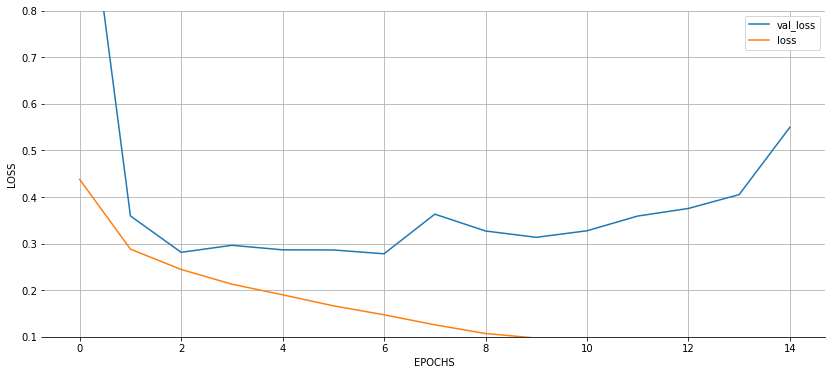

In [54]:
# TODO: plot
val_acc = hist.history['val_accuracy']
acc = hist.history['accuracy']
val_loss = hist.history['val_loss']
loss = hist.history['loss']

fig = plt.figure(figsize=(14,6))
plt.plot(np.arange(len(val_loss)),val_loss,label='val_loss')
plt.plot(np.arange(len(loss)),loss,label='loss')
plt.ylim(0.1,0.8)
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend()
plt.grid()
sns.despine(left=True)
plt.show()




Value Accuracy |  88.36 %


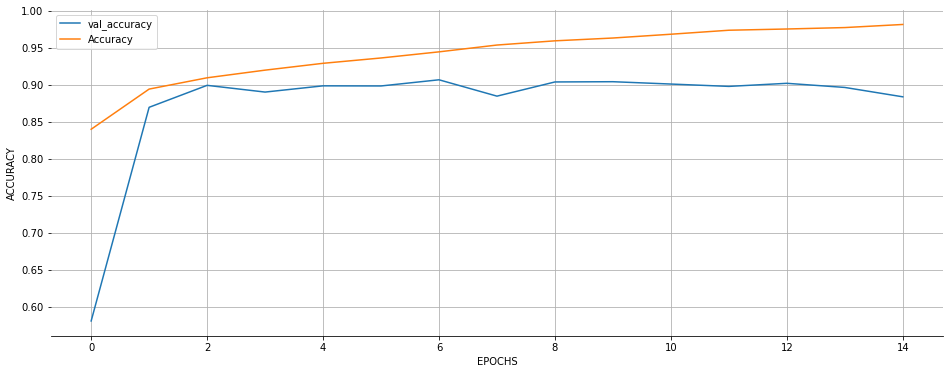

In [55]:
print("\nValue Accuracy | ",round(val_acc[len(acc)-1]*100,2),'%')
fig = plt.figure(figsize=(16,6))
plt.plot(np.arange(len(val_acc)),val_acc,label='val_accuracy')
plt.plot(np.arange(len(acc)),acc,label='Accuracy')
plt.xlabel("EPOCHS")
plt.ylabel('ACCURACY')
plt.legend()
plt.grid()
sns.despine(left=True)
plt.show()

In [56]:
# TODO: Report model performance on test set
yhat = model.predict(X_test)
yhat=np.argmax(yhat,axis=1)

# evaluate predictions
accuracy = accuracy_score(ytest, yhat)
print('Accuracy: %.3f' % (accuracy * 100))

Accuracy: 73.020


**Observation, comparison with Dropout:**

**Answer**:
if we compare Dropout and Batchnormalization models, on training and validation data BatchNormalization has high but lower than Dropout model accuracy and better performance. However, it performs well on test data. On the other hand, batchnormalization has high validation and train results, but on test data it is less efficient. 